C:\Users\5927226\AppData\Local\Temp\ipykernel_1576\516423077.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plot['file_label'] = data_plot['file_name'].apply(lambda x: x.split('metrics_sim_')[1][:6])


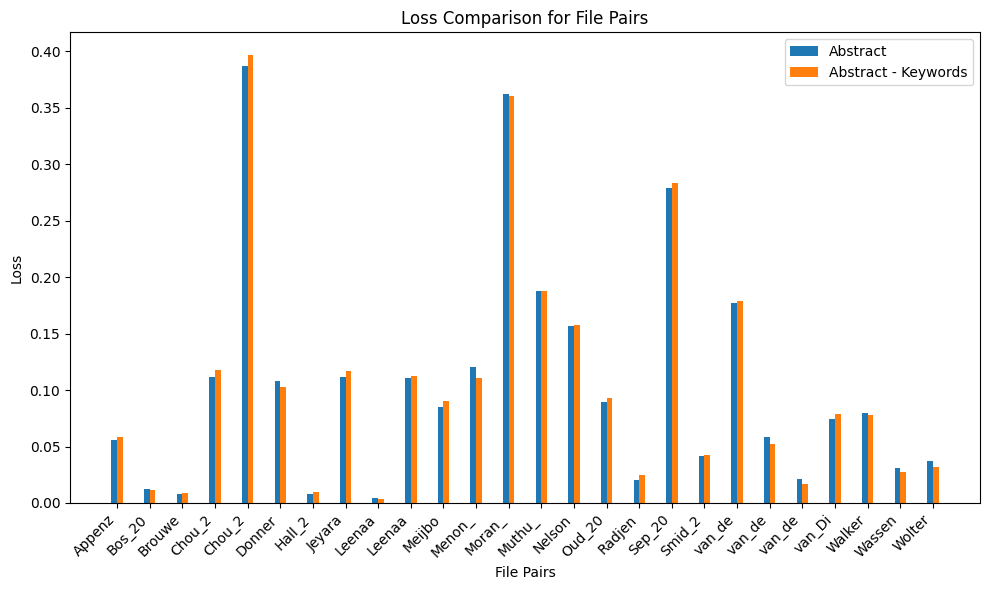

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the provided Excel file
file_path = 'metrics_sim_all.xlsx'
data = pd.read_excel(file_path)

# Extract the required columns: 'file_name' and 'loss'
data_plot = data[['file_name', 'loss']]

# Trim the file names to only include the first 6 letters after 'metrics_sim_'
data_plot['file_label'] = data_plot['file_name'].apply(lambda x: x.split('metrics_sim_')[1][:6])

# Define indices for the grouped bar plot based on every two files being a pair
indices = np.arange(len(data_plot) // 2)

# Prepare the plot data by separating loss values for pairs
loss_values_1 = data_plot['loss'].iloc[::2].reset_index(drop=True)
loss_values_2 = data_plot['loss'].iloc[1::2].reset_index(drop=True)
file_labels_trimmed = data_plot['file_label'].iloc[::2].reset_index(drop=True)  # labels for each pair

# Define bar width and x positions
bar_width = 0.35
x = indices * 2  # Add space between pairs

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, loss_values_1, width=bar_width, label='Abstract')
plt.bar(x + bar_width/2, loss_values_2, width=bar_width, label='Abstract - Keywords')

# Customize the plot with trimmed labels and legend
plt.xlabel('File Pairs')
plt.ylabel('Loss')
plt.title('Loss Comparison for File Pairs')
plt.xticks(x, file_labels_trimmed, rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('../output.png')
